#**INTRODUCTION**

### **Heart Disease Prediction Based on Research Data**
This project aims to develop models that predict whether an individual is at risk of having a heart disease using the different features from a health research dataset. The type of Machine learning task I will engage with  is a classification task.

In this project, I will be performing data inspection, Exploratory Data Analysis, data preprocessing, feature engineering, model development, hyperparameter tuning, and model evaluation.




## **Feature Descriptions (Heart Disease Dataset)**
---

### **id**

* A unique identifier for each patient record.
* Used only for record tracking.


---

### **age**

* Age of the patient in years.
* Cardiovascular risk increases with age due to vessel stiffness, plaque buildup, and reduced cardiac reserve.
* **Strong risk factor** for heart disease.

---

### **sex**

* Biological sex of the patient.
* Common encoding:

  * `0 = Female`
  * `1 = Male`
* Males generally have a **higher risk at earlier ages**, while females’ risk increases after menopause.

---

### **dataset**

* Indicates the source hospital or dataset origin (e.g., Cleveland, Hungary, Switzerland).
* Useful for **data provenance** and bias analysis.


---

### **cp (Chest Pain Type)**

* Describes the nature of chest pain experienced.
* Typical categories:

  * Typical angina
  * Atypical angina
  * Non-anginal pain
  * Asymptomatic


---

### **trestbps (Resting Blood Pressure)**

* Resting systolic blood pressure measured in mmHg.
* Hypertension damages arterial walls and increases cardiac workload.
* Chronically elevated values significantly increase cardiovascular risk.

---

### **chol (Serum Cholesterol)**

* Total cholesterol level in mg/dL.
* High cholesterol contributes to atherosclerosis and plaque formation.
* Major risk factor for coronary artery disease.

---

### **fbs (Fasting Blood Sugar)**

* Indicates whether fasting blood sugar exceeds a threshold (usually 120 mg/dL).
* Elevated levels suggest diabetes or impaired glucose tolerance.
* Diabetes significantly increases cardiovascular morbidity.

---

### **restecg (Resting ECG Results)**

* Findings from a resting electrocardiogram.
* Can indicate:

  * Normal cardiac electrical activity
  * ST-T wave abnormalities
  * Left ventricular hypertrophy
* Helps detect **structural or electrical heart abnormalities**.

---

### **thalch / thalach (Maximum Heart Rate Achieved)**

* Maximum heart rate achieved during exercise testing.
* Lower-than-expected values may indicate cardiac dysfunction.
* Strong indicator of **exercise tolerance and cardiac reserve**.

---

### **exang (Exercise-Induced Angina)**

* Indicates whether chest pain occurs during physical exertion.
* Presence suggests reduced coronary blood flow during stress.
* Strongly associated with ischemic heart disease.

---

### **oldpeak**

* ST-segment depression induced by exercise relative to rest.
* Reflects myocardial ischemia during stress testing.
* Higher values indicate more severe ischemia.

---

### **slope**

* Describes the slope of the ST segment during peak exercise.
* Typical types:

  * Upsloping
  * Flat
  * Downsloping
* Flat or downsloping patterns are associated with **worse prognosis**.

---

### **ca (Number of Major Vessels Colored by Fluoroscopy)**

* Number of major coronary arteries with visible narrowing.
* Range typically 0–4.
* **Direct measure of coronary artery disease severity**.


---

### **thal (Thalassemia / Thallium Stress Test Result)**

* Result of a nuclear imaging stress test.
* Common categories:

  * Normal
  * Fixed defect (old infarction)
  * Reversible defect (ischemia)
* Helps assess myocardial perfusion and viability.

---

### **num (Target Variable)**

* Diagnosis of heart disease severity.
* Common encoding:

  * `0 = No heart disease`
  * `1 – 4 = Increasing severity of heart disease`
---



# **1. Import Libraries**

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier


# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


# Evaluation
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             classification_report,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             roc_curve,
                             RocCurveDisplay,
                             auc
                             )
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.compose import ColumnTransformer

# Save Model
import joblib


#**2.	Data Importation**

In [60]:
# Load Dataset
file = "/content/heart_disease_uci.csv"
df = pd.read_csv(file)

#**3.	Data Inspection**

In [5]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.shape


(920, 16)

**Insight:**

The dataset has **920 rows** and **16 columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Insight:**

There are 8 **numeric data type** and 8 **object data type**

####**(a). Handling missing values**

In [8]:
# Checking if there are missing values

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
# removing null values

df.dropna(inplace=True)

In [11]:
# confirming that there are no missing values

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


####**(b). Dropping Irrelevant Features**

In [12]:
df.head(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


#### On inspecting the first  rows in the dataset, the dataset has Features that are insignificant to the task to be achieved


*   dataset
*   id




In [13]:
# Dropping Irrelevant Features

df.drop(['dataset','id'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


####**(c).** Converting **object, boolean data type** to **categorical data type**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [15]:
#Converting these columns to categorical data type

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')


**Reasons for the conversion:**

i) To save memory (especially for this large datasets)

ii) To provide easier understanding and separation of variable types

iii) To make  analysis faster

iv) To prepare the data for preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       299 non-null    int64   
 1   sex       299 non-null    category
 2   cp        299 non-null    category
 3   trestbps  299 non-null    float64 
 4   chol      299 non-null    float64 
 5   fbs       299 non-null    category
 6   restecg   299 non-null    category
 7   thalch    299 non-null    float64 
 8   exang     299 non-null    category
 9   oldpeak   299 non-null    float64 
 10  slope     299 non-null    category
 11  ca        299 non-null    float64 
 12  thal      299 non-null    category
 13  num       299 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 21.6 KB


###**(d) Handling Duplicates**

In [17]:
# Checking if there are duplicates

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


###**(e). Finding unique items in the dataset**

In [18]:
#  separating 'numeric' data types from 'non-numeric' data types in the dataset

df_catgorical = df.select_dtypes(exclude = ['number'])
df_num = df.select_dtypes(include = ['number'])

In [19]:
# Finding the number of unique items in 'non-numeric' data types

df_catgorical.nunique()

,0
sex,2
cp,4
fbs,2
restecg,3
exang,2
slope,3
thal,3


In [20]:
# Finding each unique items in the 'df_catgorical' dataset
# using for loop

for col in df_catgorical:
  print('Unique items in',str.upper(col),'Column',
          df[col].unique(),
          print('--' * 50))


----------------------------------------------------------------------------------------------------
Unique items in SEX Column ['Male', 'Female']
Categories (2, object): ['Female', 'Male'] None
----------------------------------------------------------------------------------------------------
Unique items in CP Column ['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'] None
----------------------------------------------------------------------------------------------------
Unique items in FBS Column [True, False]
Categories (2, bool): [False, True] None
----------------------------------------------------------------------------------------------------
Unique items in RESTECG Column ['lv hypertrophy', 'normal', 'st-t abnormality']
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality'] None
---------------------------------------------------------------------

**Insight:**

There are no insignificant data

# **4. Feature Engineering**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       299 non-null    int64   
 1   sex       299 non-null    category
 2   cp        299 non-null    category
 3   trestbps  299 non-null    float64 
 4   chol      299 non-null    float64 
 5   fbs       299 non-null    category
 6   restecg   299 non-null    category
 7   thalch    299 non-null    float64 
 8   exang     299 non-null    category
 9   oldpeak   299 non-null    float64 
 10  slope     299 non-null    category
 11  ca        299 non-null    float64 
 12  thal      299 non-null    category
 13  num       299 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 21.6 KB


###**(a). Creating a new column, 'age_range',  from 'age' column via feature binning**


In [22]:
# Creating new labels for the age column
labels = ['10-20','21-30','31-40',
          '41-50','51-60', '61-70',
          '71-80', '81-90', '91-100']

# Creating the bins for the labels
bins = [10,20,30,40,50,60,70,80,90,100]

# Creating the 'age_range' column
df["age_range"] = pd.cut(df["age"], bins = bins, labels =labels)


In [23]:
df["age_range"].unique()

['61-70', '31-40', '41-50', '51-60', '71-80', '21-30']
Categories (9, object): ['10-20' < '21-30' < '31-40' < '41-50' ... '61-70' < '71-80' < '81-90' < '91-100']

###**Reasons for the feature binning:**
  
i) To make computation and analysis better and faster  

ii) To provide easier and better understanding and appreciation of the dataset

iii) To prepare the data for preprocessing

#**5. Exploratory Data Analysis**

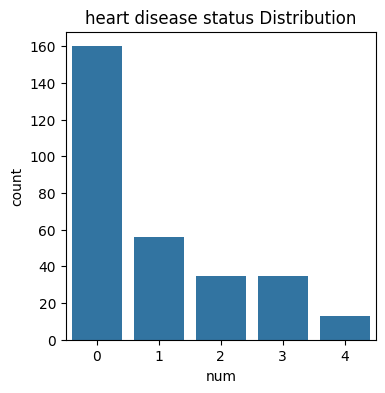

In [24]:
# Heart disease status Distribution

# Determimning the size of the bar chart
fig, ax = plt.subplots(figsize=(4, 4))

# Creating the bar chart
sns.countplot(x='num', data=df)
plt.title('heart disease status Distribution')
plt.show()

**Insight:**

Most people are without heart disease.

There are, significantly and approximately same number of people having heart diseases(1,2,3,4 combined) as those not having heart disease.

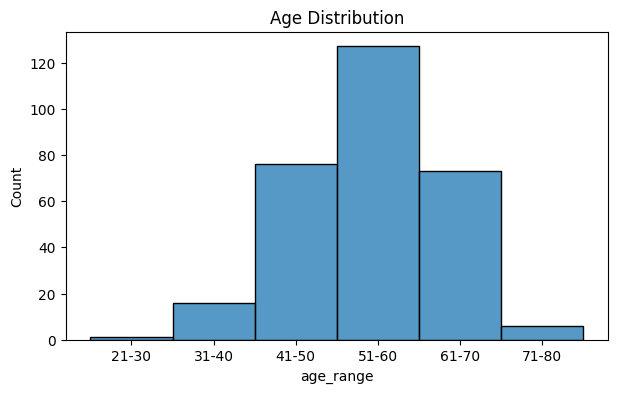

In [25]:
# Age Distribution

# Determimning the size of the Histogram
fig, ax = plt.subplots(figsize=(7, 4))

# Creating the Histogram
sns.histplot(df['age_range'], bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

**Insight:**

i). The age range with the highest number of people is '51 - 60', followed by '41 - 50', then '61 -70'.

ii). The age range with the lowest number of people is '21-30'.

iii). The dataset shows there are higher population of people within the age range of 51 years to 60 years in the region.


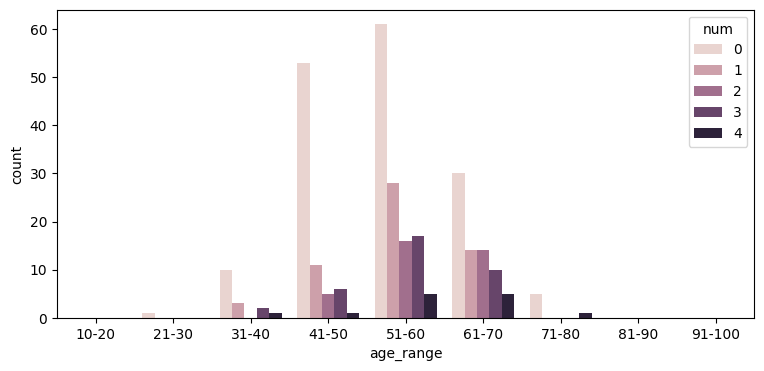

In [26]:
# Heart disease status by Age Range

# Determimning the size of the clustered bar chart
fig, ax = plt.subplots(figsize=(9, 4))

# Creating the clustered bar chart
sns.countplot(data=df, x='age_range', hue='num')
plt.xticks(rotation=0)
plt.show()

**Insight:**

i). The age range with the **highest** number of people having heart disease is 51-60.

ii). The age range with the **lowest** number of people having heart disease is 21-30.

iii). Generally as age increases from 20 to 60, the number of people having heart disease increases drastically.

iv). Generally as age increases from 70 to 80, the number of people without heart disease maintains a very high frequency. This could be as a result of insufficient sample collection of people within that age range in the population

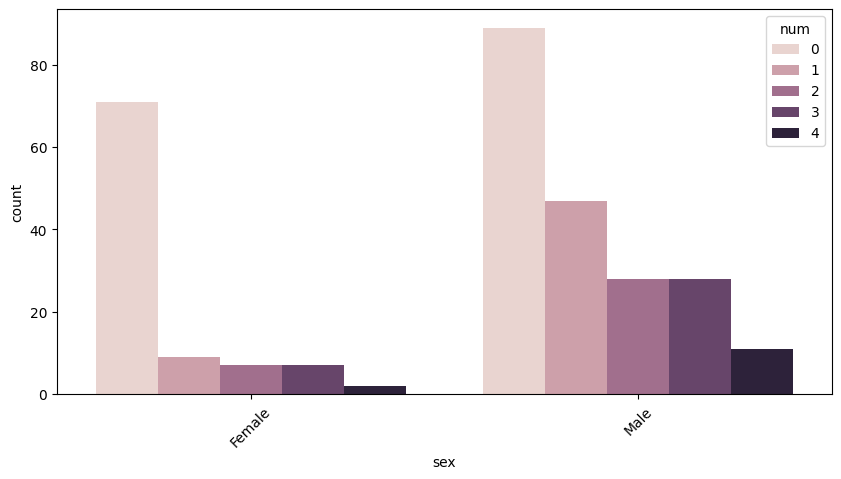

In [27]:
# heart disease status by sex

# Determimning the size of the clustered bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Creating the clustered bar chart
sns.countplot(data=df, x='sex', hue='num')
plt.xticks(rotation=45)
plt.show()

**Insight:**

i). Male tends to be at risk of heart disease more than female

ii). The data seems to capture more data on Male than Female wich might indicate inequality in access to health care facility




# **6.  Data Preprocessing**





####**(a).	Encoding Categorical Variables**

In [28]:
# Using LabelEncoder() to encode the data for Model development
lab_enc = LabelEncoder()

# List of categorical columns to encode
df_catgorical = df.select_dtypes(include = ['object','category'])

# Apply Label Encoding to each categorical column via for loop
for col in df_catgorical:
    df[col] = lab_enc.fit_transform(df[col])

#### Correlation Heatmap

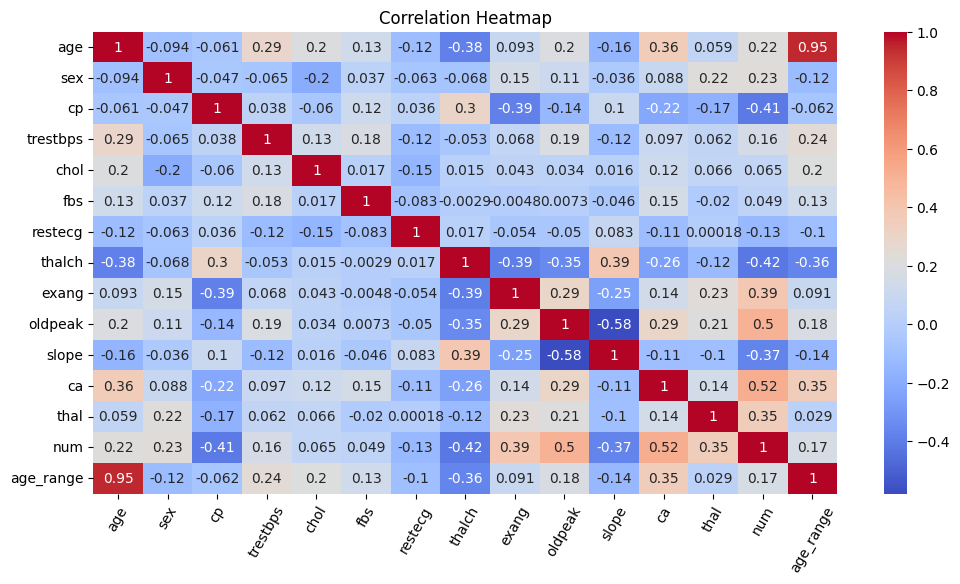

In [29]:
# Correlation Heatmap

# Determimning the size of the Heatmap
fig, ax = plt.subplots(figsize=(12, 6))

# Creating the Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.xticks(rotation=60)
plt.show()

####**(b) feature and target separation**

In [30]:
# Separating the Features from Target in the dataset

X = df.drop('num', axis=1)
y = df['num']

####**(c).	Feature Scaling**

In [31]:
# Scaling the features using StandardScaler()

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


#**7.  Model Development**

####**(a). Train-Test Split**

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [33]:
df['num'].value_counts()

,count
num,
0,160
1,56
2,35
3,35
4,13


**Insight:**

The dataset is imbalanced

***Solution:***

  apply hyperparameter tuning like **'class weight': ['balance']** to some of the models to address this issue.

####**(b). Model Selection, Training, and evaluation**


###**(i). Logistic regression model**

In [34]:
# Define the model
Log_Reg = LogisticRegression()


# Define the grid of hyperparameters
param_grid = {
    'max_iter' : [10,50,70,100,200,500,1000],
    'penalty' : ['l2'],
    'C' : [0.001,0.01,0.1,1,10,100],
    'random_state': [42],
    'class_weight': ['balanced'], #-To address imbalance in dataset
    'multi_class': ['multinomial'],
    'solver': ['lbfgs']

}




# Set up GridSearchCV
LogReg_grid_search = GridSearchCV(estimator=Log_Reg,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
LogReg_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", LogReg_grid_search.best_params_)
print("Best cross-validation F1-macro: ", LogReg_grid_search.best_score_)

Best parameters found:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 50, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best cross-validation F1-macro:  0.3649951492667605


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:



# Predictions
Log_Reg_model = LogReg_grid_search.best_estimator_
logReg_y_pred = Log_Reg_model.predict(X_test)
logReg_y_pred_proba = Log_Reg_model.predict_proba(X_test)
logReg_y_pred

array([2, 0, 1, 3, 0, 2, 0, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 4, 3,
       0, 0, 4, 4, 0, 1, 0, 4, 0, 2, 0, 1, 2, 0, 0, 1])

Accuracy: 0.5666666666666667
Precision: 0.2446428571428571
Recall: 0.23296703296703294
F1 Score: 0.23836373687119955
ROC-AUC: 0.7080926945457181
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.29      0.31      0.30        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.24      0.23      0.24        60
weighted avg       0.61      0.57      0.59        60



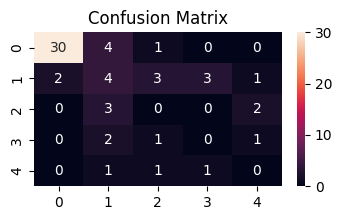

In [36]:

# Evaluation Metrics For Logistic regression

print("Accuracy:", accuracy_score(y_test, logReg_y_pred))
print("Precision:", precision_score(y_test, logReg_y_pred, average='macro'))
print("Recall:", recall_score(y_test, logReg_y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, logReg_y_pred, average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, logReg_y_pred_proba, average='macro', multi_class='ovr'))
print(classification_report(y_test, logReg_y_pred))

# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, logReg_y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()













###**(ii) K-Nearest Neighbours Model**

In [37]:

# Define the model
knn = KNeighborsClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,17,19,21,23,
                    25,27,29,31,33,35,37,39,41,43],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],


}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1_macro')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1-macro: ", grid_search.best_score_)

Best parameters found:  {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best cross-validation F1-macro:  0.3297746935328084


In [38]:
# Prediction

best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test)
y_pred_proba_knn = best_model.predict_proba(X_test)
y_pred_knn

array([2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0])

Accuracy: 0.6333333333333333
Precision: 0.2593167701863354
Recall: 0.27076923076923076
F1 Score: 0.257283950617284
ROC-AUC: 0.7254530648771409
[[35  0  0  0  0]
 [ 7  2  1  3  0]
 [ 1  3  1  0  0]
 [ 2  1  1  0  0]
 [ 1  1  1  0  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        35
           1       0.29      0.15      0.20        13
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.26      0.27      0.26        60
weighted avg       0.53      0.63      0.57        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

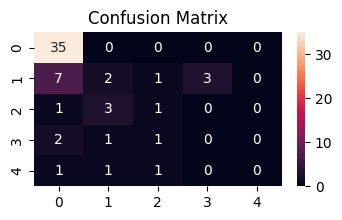

In [39]:
# # Evaluation Metrics For K-Nearest Neighbours Model

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_knn, average='macro', multi_class='ovr'))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(iii) SVC Model**

In [40]:
# Define the model
svm_clasf = svm.SVC(probability=True)


# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1,3,5,10],
    'gamma': [0.1, 0.05,0.01],
    'kernel': ['linear', 'rbf','poly'],
    'degree': [1, 2,3,4,8],
    'class_weight': [None, 'balanced'],


}




# Set up GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm_clasf,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", svm_grid_search.best_params_)
print("Best cross-validation F1-macro: ", svm_grid_search.best_score_)

Best parameters found:  {'C': 10, 'class_weight': None, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation F1-macro:  0.3795968831682367


In [41]:
# Make Predictions:

best_model_params = svm_grid_search.best_params_

# Create a new SVC instance with best parameters and explicitly ensure probability=True
best_model = svm.SVC(probability=True,
                     C=best_model_params['C'],
                     gamma=best_model_params['gamma'],
                     kernel=best_model_params['kernel'],
                     degree=best_model_params['degree'],
                     class_weight=best_model_params['class_weight'])

# Fit this new best_model on the training data
best_model.fit(X_train, y_train)

y_pred_SVM = best_model.predict(X_test)
# Get predicted probabilities for ROC-AUC
y_pred_proba_SVM = best_model.predict_proba(X_test)
y_pred_SVM

array([2, 0, 1, 2, 0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 2, 3, 0, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0])

Accuracy: 0.6
Precision: 0.23166666666666663
Recall: 0.23472527472527474
F1 Score: 0.23054545454545455
ROC-AUC: 0.8022322543016271
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.33      0.23      0.27        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.23      0.23      0.23        60
weighted avg       0.55      0.60      0.57        60



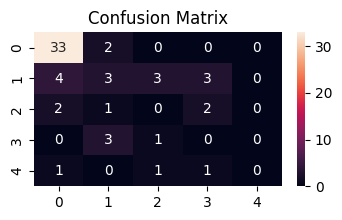

In [42]:
# Evaluation Metrics For  SVM Model

print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Precision:", precision_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_SVM, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_SVM, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(iv) Decision Tree Classifier Model**

In [43]:
# Define the model
dt_clasf = DecisionTreeClassifier()


# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 3, 5,7,9,10],
    'class_weight': ['balanced'], #-To address imbalance in dataset
    'max_features': ['sqrt', 'log2', None],


}




# Set up GridSearchCV
dt_clasf_grid_search = GridSearchCV(estimator=dt_clasf,
                                    param_grid=param_grid,
                                    cv=5,
                                    n_jobs=-1,
                                    scoring='f1_macro')

# Fit the model
dt_clasf_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", dt_clasf_grid_search.best_params_)
print("Best cross-validation F1-macro: ", dt_clasf_grid_search.best_score_)

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 20}
Best cross-validation F1-macro:  0.3942015589256969


In [44]:
# Make predictions
best_model = dt_clasf_grid_search.best_estimator_
y_pred_dt_clasf = best_model.predict(X_test)
y_pred_proba_dt_clasf = best_model.predict_proba(X_test)
y_pred_dt_clasf

array([4, 0, 4, 4, 4, 3, 0, 4, 0, 4, 0, 3, 0, 4, 1, 3, 0, 4, 0, 1, 4, 0,
       1, 0, 0, 0, 1, 3, 0, 0, 3, 0, 1, 3, 3, 4, 4, 4, 0, 0, 0, 0, 4, 2,
       0, 0, 4, 2, 0, 1, 0, 0, 0, 4, 0, 1, 3, 3, 3, 1])

Accuracy: 0.48333333333333334
Precision: 0.3923333333333333
Recall: 0.3342490842490842
F1 Score: 0.3184126984126984
ROC-AUC: 0.6888819870965168
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        35
           1       0.38      0.23      0.29        13
           2       0.50      0.20      0.29         5
           3       0.10      0.25      0.14         4
           4       0.07      0.33      0.11         3

    accuracy                           0.48        60
   macro avg       0.39      0.33      0.32        60
weighted avg       0.67      0.48      0.55        60



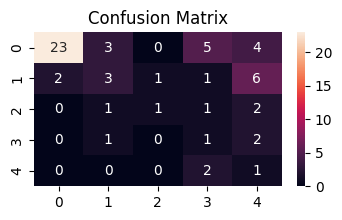

In [45]:
# Evaluation Metrics For Decision Tree Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_dt_clasf))
print("Precision:", precision_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt_clasf, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_dt_clasf, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_clasf), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(v) Random Forest Classifier Model**

In [46]:

# Define the model
rfc = RandomForestClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced'], #-To address imbalance dataset

}


# Set up GridSearchCV
rfc_grid_search = GridSearchCV(estimator=rfc,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
rfc_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", rfc_grid_search.best_params_)
print("Best cross-validation F1-macro: ", rfc_grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 20}
Best cross-validation F1-macro:  0.42671767535296945


In [47]:
# Make predictions on the test set
best_model = rfc_grid_search.best_estimator_
y_pred_rfc = best_model.predict(X_test)
y_pred_proba_rfc = best_model.predict_proba(X_test)
y_pred_rfc

array([2, 0, 0, 3, 0, 3, 0, 1, 0, 3, 0, 0, 0, 4, 0, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 4, 2, 0, 0, 0, 1, 0, 3, 0, 2, 3, 0, 0, 0])

Accuracy: 0.6666666666666666
Precision: 0.3784461152882206
Recall: 0.4047252747252747
F1 Score: 0.38082191780821917
ROC-AUC: 0.807772031228694
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        35
           1       0.43      0.23      0.30        13
           2       0.43      0.60      0.50         5
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.38      0.40      0.38        60
weighted avg       0.65      0.67      0.65        60



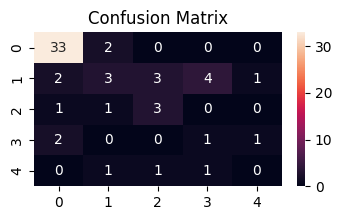

In [48]:
# Evaluation Metrics For Decision Tree Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rfc, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_rfc, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


###**(vi) AdaBoost Classifier Model**

In [49]:

# Define the model
ABClasf_ =  AdaBoostClassifier(estimator=DecisionTreeClassifier())


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50,100,150,200,300],
    'learning_rate': [0.01, 0.05,0.1, 0.5,1.0],
    'estimator__max_depth': [1, 2, 3, 4],


}


# Set up GridSearchCV
abc_grid_search = GridSearchCV(estimator=ABClasf_,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
abc_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", abc_grid_search.best_params_)
print("Best cross-validation F1-macro: ", abc_grid_search.best_score_)

Best parameters found:  {'estimator__max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 150}
Best cross-validation F1-macro:  0.3762646982646983


In [50]:





# Make predictions on the test set
best_model = abc_grid_search.best_estimator_
y_pred_abc = best_model.predict(X_test)
y_pred_proba_abc = best_model.predict_proba(X_test)
y_pred_abc

array([2, 0, 1, 3, 0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 4, 0, 2, 3, 0, 0, 1])

Accuracy: 0.5833333333333334
Precision: 0.3383333333333333
Recall: 0.3515384615384615
F1 Score: 0.342336592897581
ROC-AUC: 0.7148833696600774
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.25      0.31      0.28        13
           2       0.40      0.40      0.40         5
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.34      0.35      0.34        60
weighted avg       0.61      0.58      0.59        60



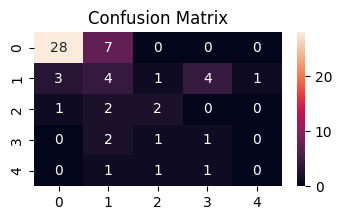

In [51]:
# Evaluation Metrics For AdaBoost Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Precision:", precision_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_abc, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_abc, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_abc), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(vii) Gradient Boosting Classifier Model**

In [52]:
# Define the model
GBClasf =  GradientBoostingClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50,100,200,],
    'learning_rate': [0.01,0.05, 0.1, 1.0],
    'max_depth': [2,3,4, 5,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2'],





}


# Set up GridSearchCV
GBC_grid_search = GridSearchCV(estimator=GBClasf,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
GBC_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", GBC_grid_search.best_params_)
print("Best cross-validation F1-macro: ", GBC_grid_search.best_score_)

Best parameters found:  {'learning_rate': 1.0, 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best cross-validation F1-macro:  0.38747771745508597


In [53]:
# Make predictions on the test set
best_model = GBC_grid_search.best_estimator_
y_pred_GBC = best_model.predict(X_test)
y_pred_proba_GBC = best_model.predict_proba(X_test)
y_pred_GBC

array([2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 2, 2, 0, 1, 0, 3, 0, 1, 0, 1, 1, 0, 0, 1])

Accuracy: 0.65
Precision: 0.3123529411764706
Recall: 0.34945054945054943
F1 Score: 0.3269628921802835
ROC-AUC: 0.708651256774829
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.40      0.46      0.43        13
           2       0.25      0.40      0.31         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.31      0.35      0.33        60
weighted avg       0.64      0.65      0.64        60



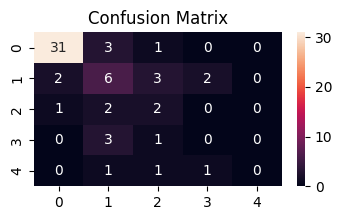

In [54]:
# Evaluation Metrics For Gradient Boosting Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_GBC))
print("Precision:", precision_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_GBC, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_GBC, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_GBC), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(viii) XGBoost classifier Model**

In [55]:
# Define the model

xgb_model = xgb.XGBClassifier()


# Define the grid of hyperparameters
param_grid = {

    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.2],
    'max_depth': [3, 5, 6],
    'subsample': [0.5, 0.7, 0.9],
    'scale_pos_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree': [0.7, 0.8, 1.0],



}


# Set up GridSearchCV
XGB_grid_search = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')


# Fit the model
XGB_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", XGB_grid_search.best_params_)
print("Best cross-validation F1-macro: ", XGB_grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 0.5}
Best cross-validation F1-macro:  0.3796454562641175


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:19:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [56]:
# Make predictions on the test set
best_model = XGB_grid_search.best_estimator_
y_pred_XGB = best_model.predict(X_test)
y_pred_proba_XGB = best_model.predict_proba(X_test)
y_pred_XGB

array([2, 0, 0, 3, 0, 1, 0, 2, 0, 3, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 0, 3, 3, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1])

Accuracy: 0.6
Precision: 0.5627889167362851
Recall: 0.6
F1 Score: 0.5780821917808219
ROC-AUC: 0.8349849450350569
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.22      0.15      0.18        13
           2       0.17      0.20      0.18         5
           3       0.14      0.25      0.18         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.27      0.30      0.28        60
weighted avg       0.56      0.60      0.58        60



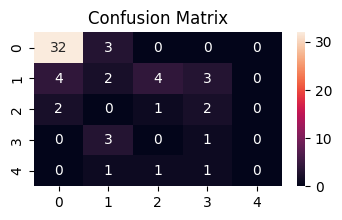

In [57]:
# Evaluation Metrics For XGBoost classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_XGB))
print("Precision:", precision_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_XGB, average='weighted', multi_class='ovr'))
print(classification_report(y_test, y_pred_XGB, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

##**8. Ploting ROC_AUC score and curve for all the Models**

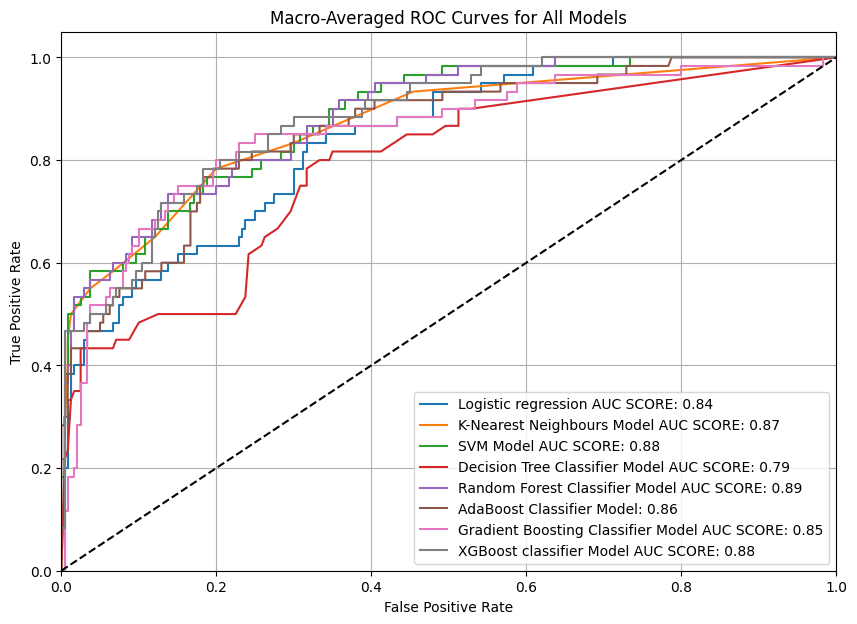

In [58]:
from sklearn.preprocessing import label_binarize

# Binarize y_test for macro-average ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# --- Calculate ROC curve and AUC for each model using macro-average ---

# Logistic Regression
fpr_Log, tpr_Log, _ = roc_curve(y_test_binarized.ravel(), logReg_y_pred_proba.ravel())
auc_Log = auc(fpr_Log, tpr_Log)

# K-Nearest Neighbours Model
fpr_KNN, tpr_KNN, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_knn.ravel())
auc_KNN = auc(fpr_KNN, tpr_KNN)

# SVM Model
fpr_SVM, tpr_SVM, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_SVM.ravel())
auc_SVM = auc(fpr_SVM, tpr_SVM)

# Decision Tree Classifier Model
fpr_DT_clasf, tpr_DT_clasf, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_dt_clasf.ravel())
auc_DT_clasf = auc(fpr_DT_clasf, tpr_DT_clasf)

# Random Forest Classifier Model
fpr_RFC, tpr_RFC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_rfc.ravel())
auc_RFC = auc(fpr_RFC, tpr_RFC)

# AdaBoost Classifier Model
fpr_ABC, tpr_ABC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_abc.ravel())
auc_ABC = auc(fpr_ABC, tpr_ABC)

# Gradient Boosting Classifier Model
fpr_GBC, tpr_GBC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_GBC.ravel())
auc_GBC = auc(fpr_GBC, tpr_GBC)

# XGBoost classifier Model
fpr_XGB, tpr_XGB, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_XGB.ravel())
auc_XGB = auc(fpr_XGB, tpr_XGB)


# --- Plot the ROC_AUC curve ---
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.plot(fpr_Log, tpr_Log, label=f"Logistic regression AUC SCORE: {auc_Log:.2f}")
plt.plot(fpr_KNN, tpr_KNN,  label=f"K-Nearest Neighbours Model AUC SCORE: {auc_KNN:.2f}")
plt.plot(fpr_SVM, tpr_SVM,  label=f"SVM Model AUC SCORE: {auc_SVM:.2f}")
plt.plot(fpr_DT_clasf, tpr_DT_clasf, label=f"Decision Tree Classifier Model AUC SCORE: {auc_DT_clasf:.2f}")
plt.plot(fpr_RFC, tpr_RFC,  label=f"Random Forest Classifier Model AUC SCORE: {auc_RFC:.2f}")
plt.plot(fpr_ABC, tpr_ABC,  label=f"AdaBoost Classifier Model: {auc_ABC:.2f}")
plt.plot(fpr_GBC, tpr_GBC, label=f"Gradient Boosting Classifier Model AUC SCORE: {auc_GBC:.2f}")
plt.plot(fpr_XGB, tpr_XGB,  label=f"XGBoost classifier Model AUC SCORE: {auc_XGB:.2f}")

plt.plot([0, 1], [0, 1], 'k--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Macro-Averaged ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- The best models  (Random Forest Classifier Model  with tuned hyperparameters) had the highest ROC_AUC score, and achieved a good balance between precision and recall,  indicating better performance than other models

In [65]:
# Saving the model

D_best_model = rfc_grid_search.best_estimator_
joblib.dump(D_best_model, 'rfc_heart_disease_predictor_model.joblib')

['rfc_heart_disease_predictor_model.joblib']

## Summary:
**Data inspection and cleaning**
- Irrelevant column was dropped
- Rows with missing data and duplicates were removed
- Irrelevant data  was removed
- Relevant columns needing conversion were converted to categorical data type.

**Feature engineering**
- Feature binning was done on some features  for easier exploratory data analysis and better data preprocessing
-New features such as  'age_range' were created from existing features for better appreciation of the data.

**Exploratory Data Analysis**

- Male tends to be at risk of heart disease more than female
- The data seems to capture more data on Male than Female wich might indicate inequality in access to health care facility
- The age range with the **highest** number of people having heart disease is 51-60.

**Data preprocessing**
- Data was encoded for model training
- Features were scaled to ensure that all  features contribute equally to the model's learning process.

**Model training and evaluation**
- The best model  (Random Forest Classifier Model  with tuned hyperparameters) had the highest ROC_AUC score, and achieved a good balance between precision and recall,  indicating better performance than other models


## Limitations:
- Higher number of estimators could not be applied in hyperparameter tuning due to insufficient and unavailable computational resources for model training
- Number of hyperparameters applied were reduced as well due to inefficient computational resources for model training
- A relatively small dataset which may affect learning process of the models




## Recommendations(for better acurracy and performance of the trained models):
- Access to efficient and proficient computational resources to have higher accurate-performing models ( training and evaluation).
- Collecting more granular and relevant data features like job role(sedentary life-style), industry sector( exposure to hazards), or location.
- Exploring deep learning for further improvement and development of more models.
- Availability of Data from Nigeria and Other African Health research centres and Hospitals to prevent Bias in model training
